In [5]:
#데이터 분석

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#성적 분석 예제

df = pd.read_csv("data/score.csv")
print(df)

    반   이름   국어  영어  수학  과학
0   1  성춘향   67  87  90  98
1   1  이몽룡   45  45  56  98
2   1  향단이   95  59  96  88
3   1   방자   65  94  89  98
4   1   월매   45  65  78  98
5   1  변학도   78  76  98  89
6   2  홍길동   87  67  65  56
7   2  임꺽정   89  98  78  78
8   2  전우치  100  78  56  65
9   2  일지매   99  89  87  87
10  2   심청   98  45  56  54
11  2   콩쥐   65  89  87  78


In [8]:
df.info() #컬럼 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   반       12 non-null     int64 
 1   이름      12 non-null     object
 2   국어      12 non-null     int64 
 3   영어      12 non-null     int64 
 4   수학      12 non-null     int64 
 5   과학      12 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 704.0+ bytes


In [9]:
df.describe() #통계 정보

,반,국어,영어,수학,과학
count,12.000000,12.0000,12.000000,12.000000,12.000000
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726
min,1.000000,45.0000,45.000000,56.000000,54.000000
25%,1.000000,65.0000,63.500000,62.750000,74.750000
50%,1.500000,82.5000,77.000000,82.500000,87.500000
75%,2.000000,95.7500,89.000000,89.250000,98.000000
max,2.000000,100.0000,98.000000,98.000000,98.000000


In [18]:
subjects = ['국어', '영어', '수학', '과학'] #list

# df['추가할 컬럼'] = 계산식 : df에 컬럼 추가 방법
# df.drop('총점', axis = 1) : df컬럼 삭제 방법
# axis: row col => 0이면 행 1이면 열

# df['총점'] = df[subjects].sum(axis=1)
df

,반,이름,국어,영어,수학,과학,총점
0,1,성춘향,67,87,90,98,342
1,1,이몽룡,45,45,56,98,244
2,1,향단이,95,59,96,88,338
3,1,방자,65,94,89,98,346
4,1,월매,45,65,78,98,286
5,1,변학도,78,76,98,89,341
6,2,홍길동,87,67,65,56,275
7,2,임꺽정,89,98,78,78,343
8,2,전우치,100,78,56,65,299
9,2,일지매,99,89,87,87,362


In [21]:
df['평균'] = df[subjects].mean(axis=1)

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50


In [30]:
#정렬
sorted_df = df.sort_values(['평균', '이름'], ascending=[False, True]) #평균이 높은 순, 이름 가나다순

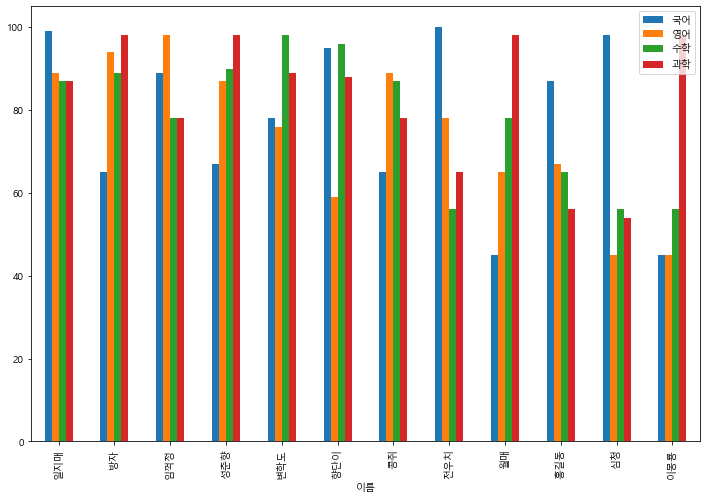

In [39]:
#시각화
import matplotlib
matplotlib.rc('font', family='Malgun Gothic') #한글 깨짐 방지

sorted_df.index = sorted_df['이름']
sorted_df
# sorted_df['평균'].plot(kind='bar', figsize=(12, 8))
sorted_df[subjects].plot(kind='bar', figsize=(12, 8))
# plt.savefig('image1.jpg') #임시 파일 만들기
plt.show()

In [54]:
#타이타닉 호 승객 생존 예측 프로젝트

df = pd.read_excel("data/titanic.xls")

#데이터 전처리
df.isnull().sum() #결측치 개수 출력
df[df['fare'].isnull()] #00이 결측치인 사람을 출력하기 : df [조건]


#생존자와 사망자 수
print("생존자 수: ", df['survived'].sum())
print("사망자 수: ", 1309 - df['survived'].sum())
print("사망자 수 ", df['survived'].count() - df['survived'].sum())

생존자 수:  500
사망자 수:  809
사망자 수  809


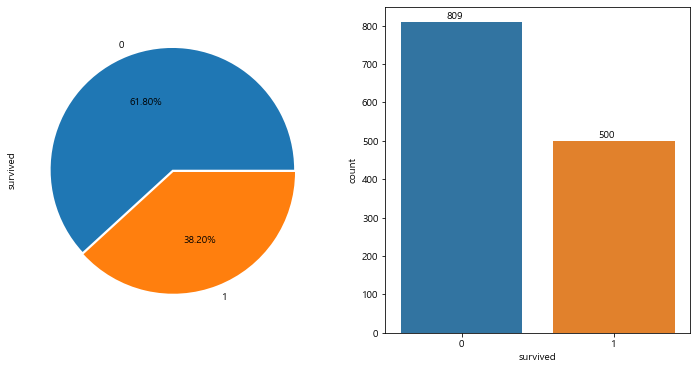

In [70]:
import warnings
warnings.filterwarnings('ignore') #python warning 무시


#시각화
plt.figure(figsize=(12,6))
plt.subplot(121) # 121: 행 열 순서
df['survived'].value_counts().plot.pie(explode=[0, 0.02], autopct="%.2f%%") #pandas 그래프
#value_counts() 값 세고, explode: 항목 간 간격, autopct: 퍼센트 표기 
plt.subplot(122)
gl = sns.countplot('survived', data=df) #seaborn 그래프
for p in gl.patches: #막대그래프에 값 표기하기
    gl.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+10))
plt.show()

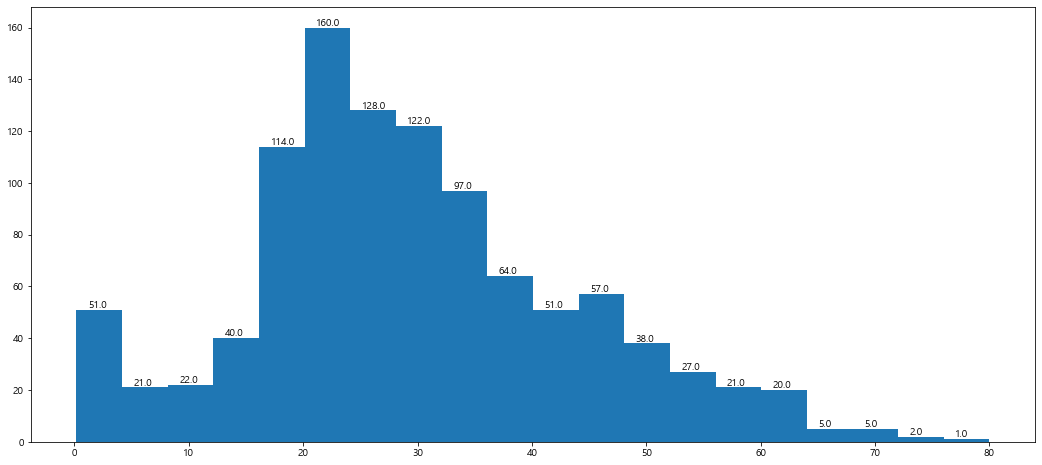

In [71]:
#연령대 그래프: 분포도(히스토그램)

gl = df['age'].hist(bins=20, grid=False, figsize=(18,8)) #pandas 그래프
for p in gl.patches: #막대그래프에 값 표기하기
    gl.annotate(f"{p.get_height()}", (p.get_x()+1, p.get_height()+0.8))
plt.show()

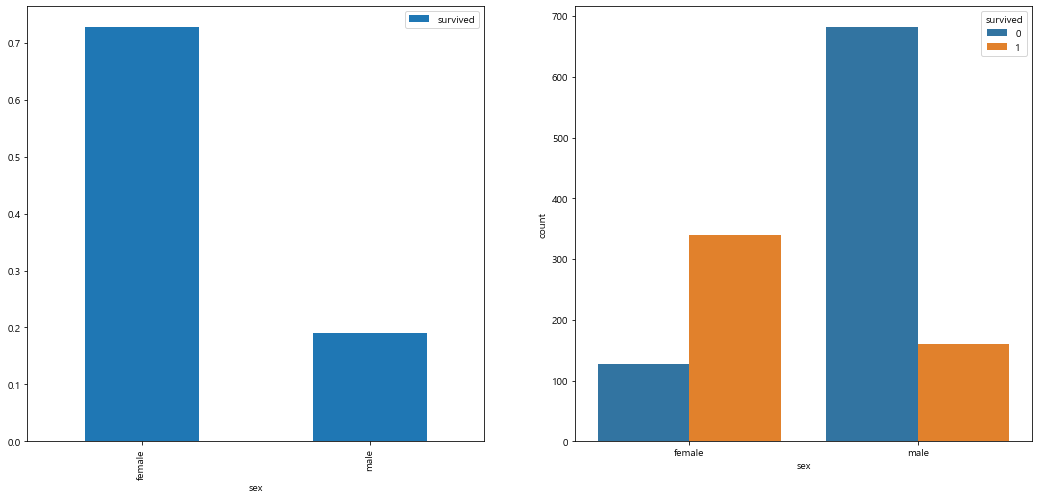

In [81]:
#성별과 생존의 관계 출력
df.groupby(['sex', 'survived'])['survived'].count() #인원수
df[['sex', 'survived']].groupby(['sex']).mean() #평균

#성별별 생존 그래프
plt.figure(figsize=(18,8))
sub1 = plt.subplot(121)
df[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=sub1) #생존 그래프
plt.subplot(122)
sns.countplot('sex', hue='survived', data=df) #hue = 구분, 생존/사망 그래프
plt.show()

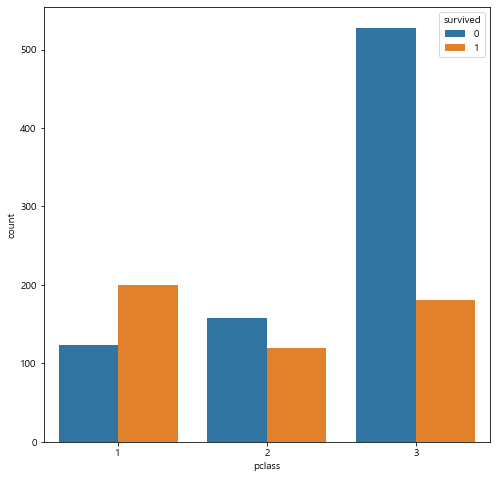

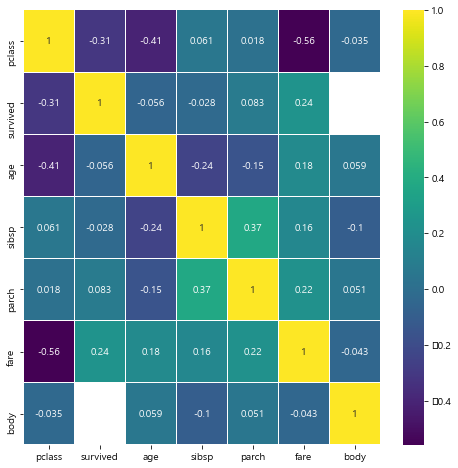

In [91]:
#선실 등급별 그래프
pd.crosstab(df['pclass'], df['survived'], margins=True)

plt.figure(figsize=(8,8))
sns.countplot('pclass', hue='survived', data=df) #hue = 구분, 생존/사망 그래프
plt.show()

df.groupby('pclass').mean() #평균
df.corr() #상관계수
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.01, annot=True, cmap=plt.cm.viridis) 
#annot: 값 써줌, cmap: 색깔 바꿔줌
plt.show()